**1. Data Preprocessing:**
- Clean and preprocess the dataset, handling any missing values or outliers.
- Combine the date and time columns into a datetime format for effective time series analysis.

Combining Date and Time:
- The code combines the Date and Time columns into a Datetime column and sets it as the index. This is essential for time series analysis.

Handling Missing Values:
- The code checks for missing values and fills them with the mean of the respective columns.

Handling Outliers:
- The code visualizes the data to identify outliers and then caps the values at the 99th percentile to manage them.

Initial Data:
                    Global_active_power Global_reactive_power  Voltage  \
Datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0

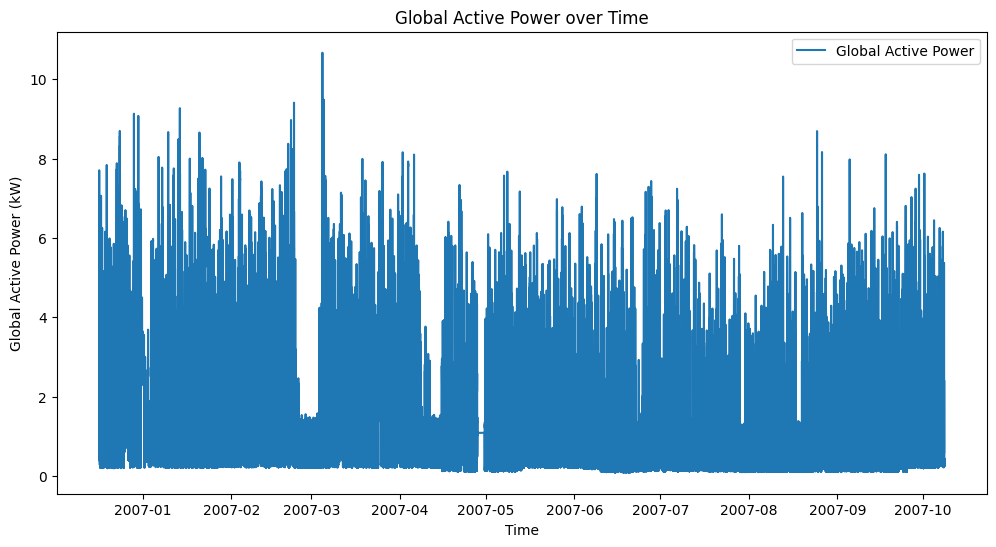

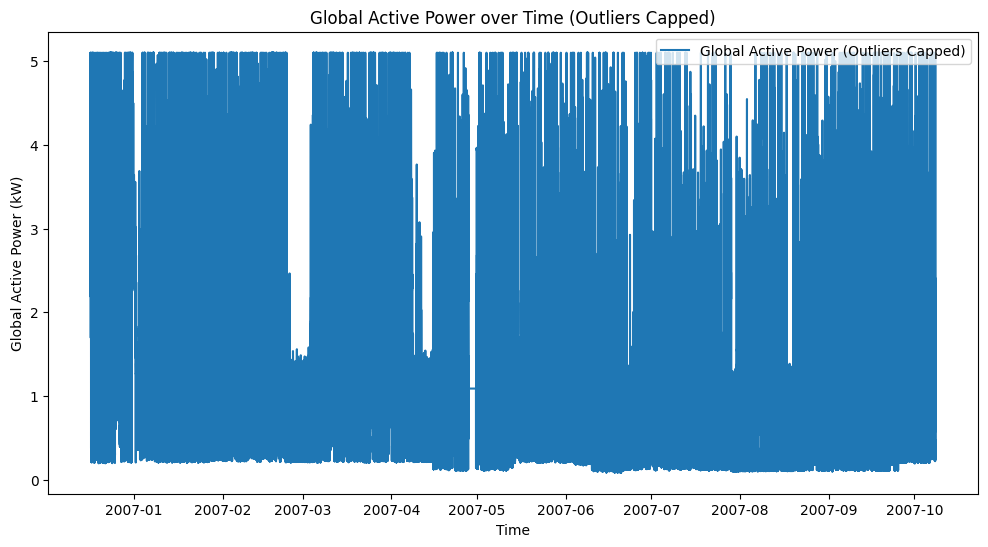


Summary Statistics:
       Global_active_power  Global_reactive_power        Voltage  \
count        425914.000000          425914.000000  425914.000000   
mean              1.079333               0.123166     239.042834   
std               1.109981               0.109488       3.537679   
min               0.082000               0.000000     223.490000   
25%               0.266000               0.046000     236.550000   
50%               0.476000               0.106000     239.390000   
75%               1.512000               0.192000     241.550000   
max               5.102000               1.148000     251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count     425914.000000   425914.000000   425914.000000   425914.000000  
mean           4.659054        1.219502        1.630082        5.523938  
std            4.840823        6.401435        6.525378        8.026168  
min            0.400000        0.000000        0.000000        0.00000

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Data
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)

# Combine Date and Time columns into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Set the Datetime column as the index
df.set_index('Datetime', inplace=True)

# Drop the original Date and Time columns
df.drop(columns=['Date', 'Time'], inplace=True)

# Display the first few rows of the dataframe
print("Initial Data:")
print(df.head())

# Step 2: Handle Missing Values and Convert Data Types
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values with the mean (you can also use interpolation or other methods)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# Verify that missing values have been handled
print("\nMissing Values After Filling:")
print(df.isnull().sum())

# Step 3: Handle Outliers
# Plotting data to visualize outliers
plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Handle outliers by capping values at a certain threshold
# Here, we are using the 99th percentile to clip outliers
quantile_99 = df['Global_active_power'].quantile(0.99)
df['Global_active_power'] = df['Global_active_power'].clip(upper=quantile_99)

# Verify the change by plotting again
plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power (Outliers Capped)')
plt.title('Global Active Power over Time (Outliers Capped)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Display summary statistics to understand the dataset better
print("\nSummary Statistics:")
print(df.describe())


**2. Exploratory Data Analysis (EDA):**
- Conduct EDA to uncover patterns, trends, and seasonality in electricity consumption.
- Visualize the relationships between different features to gain insights.

Load the Preprocessed Data
- Load the preprocessed dataset (as cleaned in the previous step).

Overview of the Data
- Get a summary of the data to understand its basic statistics.
- Visualize the time series data to identify overall trends and patterns.

Check for Seasonality and Trends
- Decompose the time series data to identify seasonal, trend, and residual components.
- Use moving averages to smooth the data and highlight trends.

Correlation Analysis
- Calculate and visualize the correlation matrix to understand relationships between different features.

Visualize Distributions
- Plot histograms and density plots to visualize the distribution of key variables.

Visualize Time Series Data
- Create plots for different time periods (daily, weekly, monthly) to uncover seasonality and trends.

Data:
                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.102                  0.436   233.63   
2006-12-16 17:26:00                5.102                  0.498   233.29   
2006-12-16 17:27:00                5.102                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00    

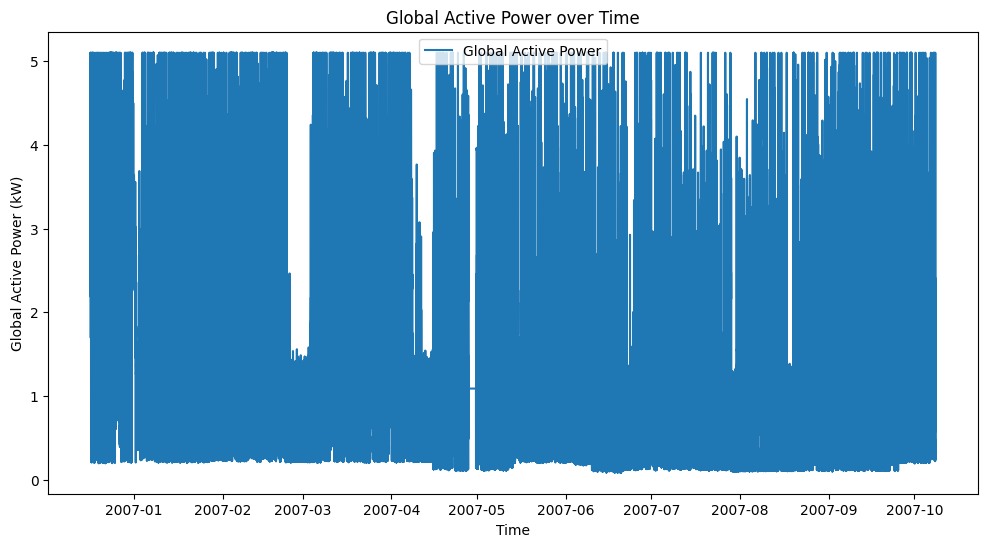

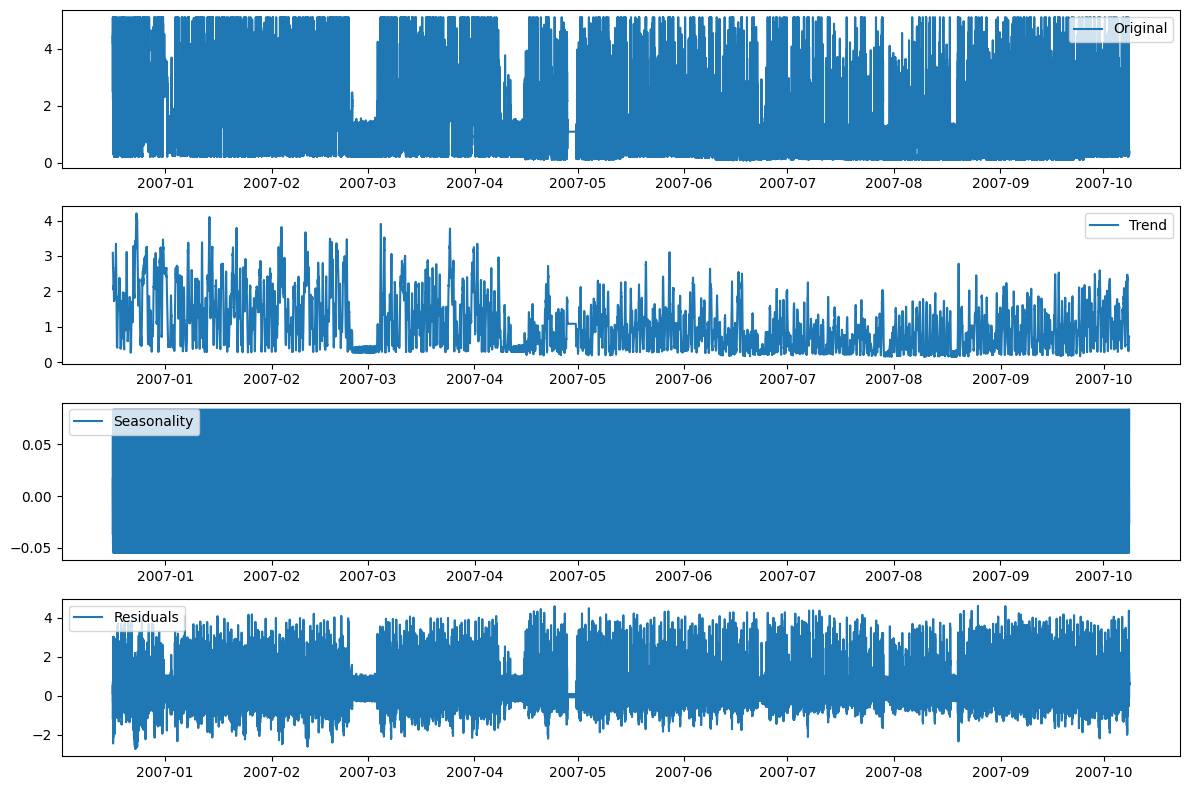

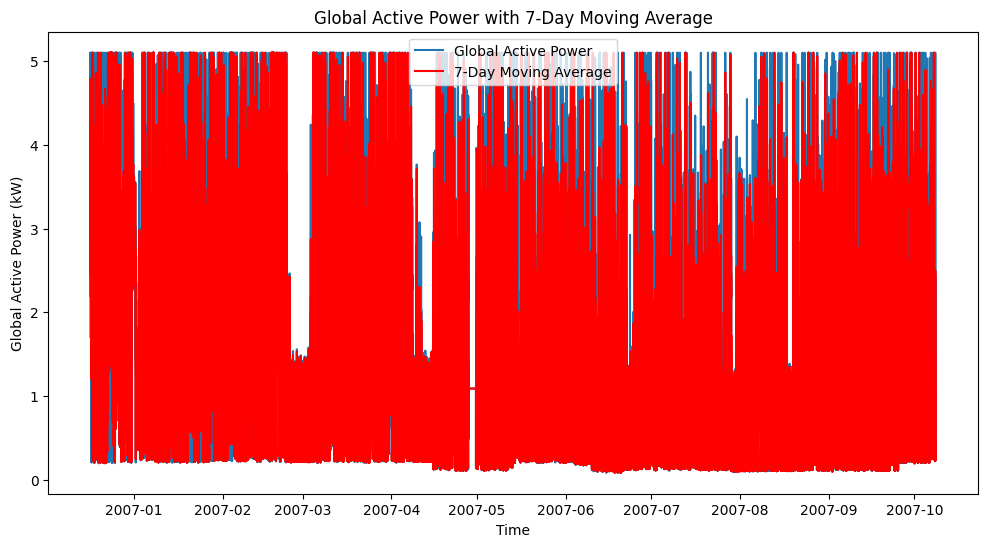

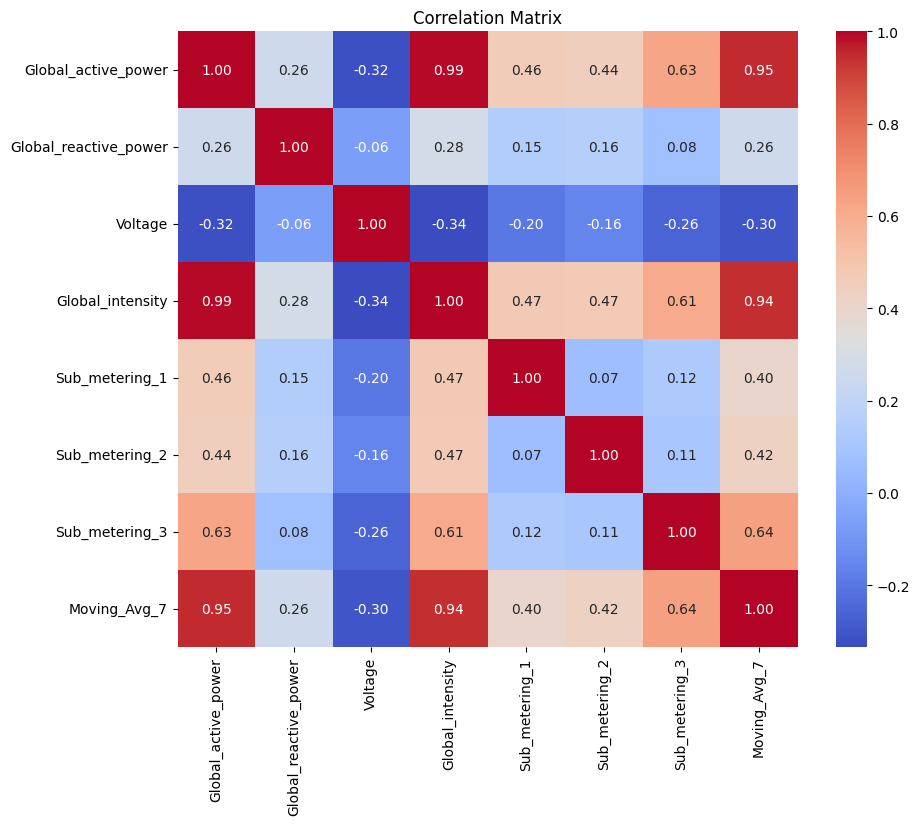

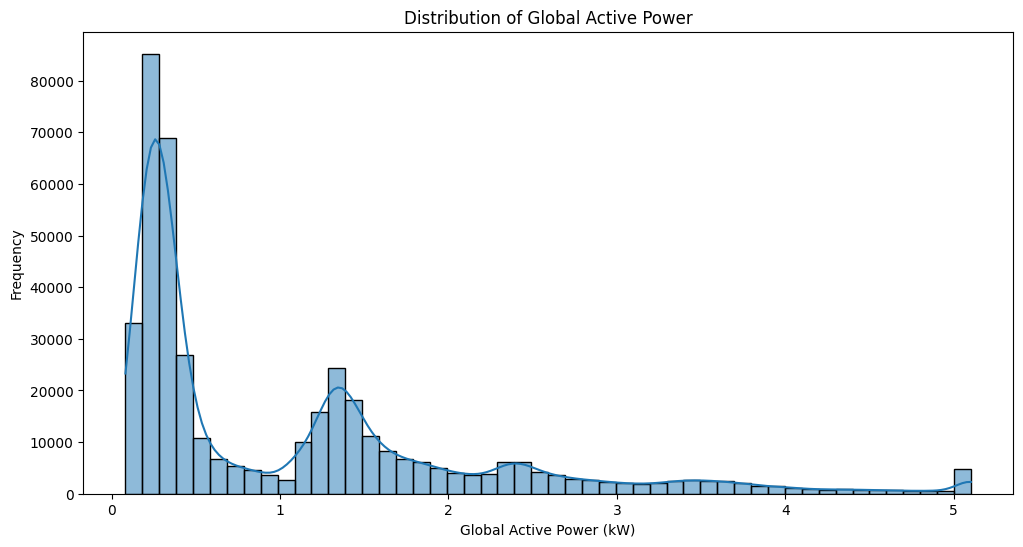

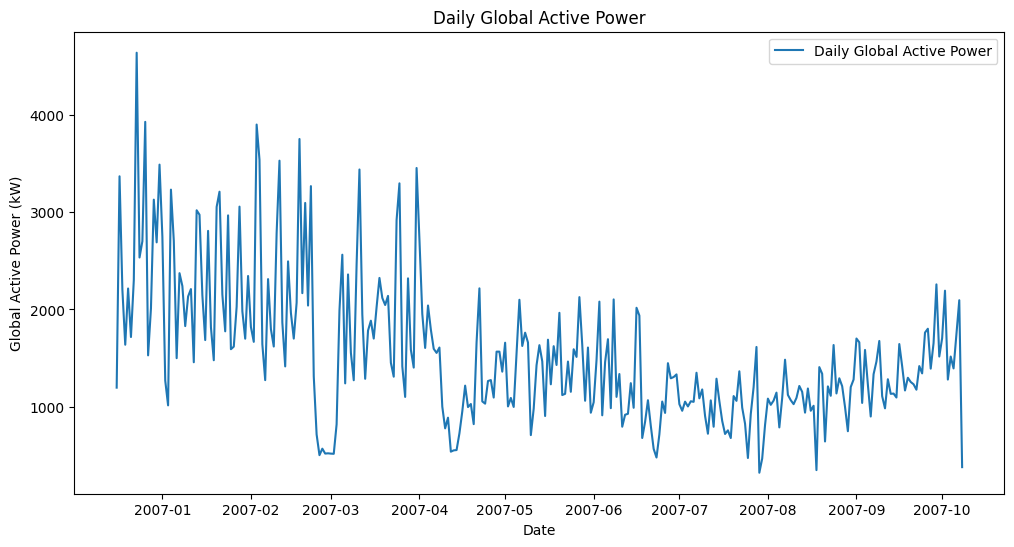

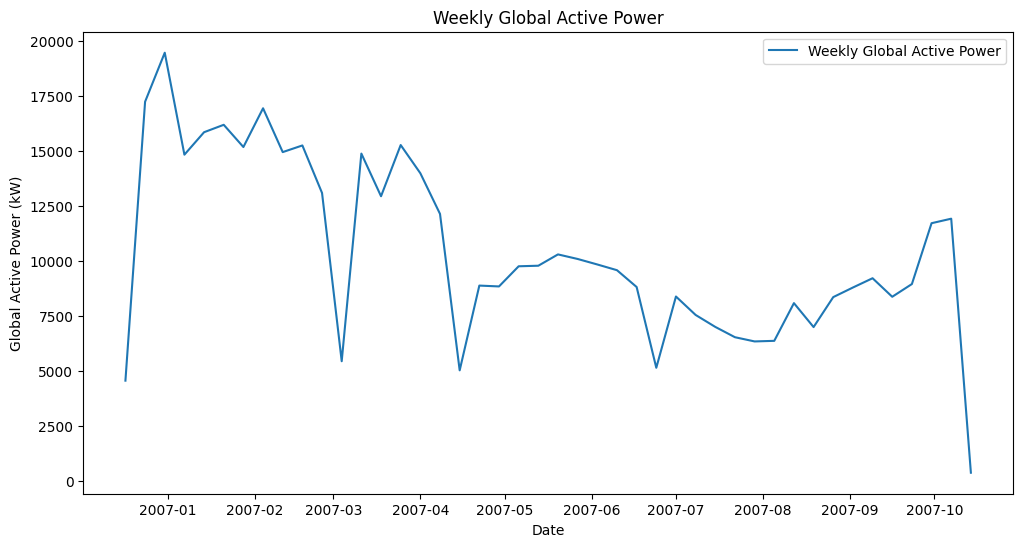

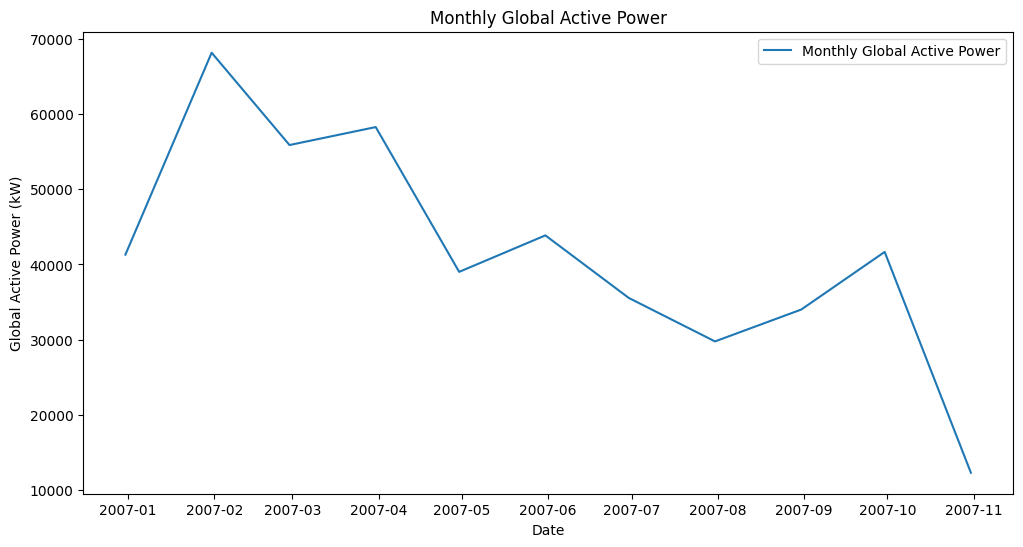

In [3]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load the Preprocessed Data
# Display the first few rows of the dataframe
print("Data:")
print(df.head())

# Step 2: Overview of the Data
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualize the overall time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Step 3: Check for Seasonality and Trends
# Decompose the time series
decomposition = seasonal_decompose(df['Global_active_power'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Global_active_power'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Moving Average
df['Moving_Avg_7'] = df['Global_active_power'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.plot(df['Moving_Avg_7'], label='7-Day Moving Average', color='red')
plt.title('Global Active Power with 7-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Step 4: Correlation Analysis
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Visualize Distributions
# Histogram and Density Plot for Global Active Power
plt.figure(figsize=(12, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.show()

# Step 6: Visualize Time Series Data by Time Period
# Daily Aggregation
df_daily = df['Global_active_power'].resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(df_daily, label='Daily Global Active Power')
plt.title('Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Weekly Aggregation
df_weekly = df['Global_active_power'].resample('W').sum()

plt.figure(figsize=(12, 6))
plt.plot(df_weekly, label='Weekly Global Active Power')
plt.title('Weekly Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

# Monthly Aggregation
df_monthly = df['Global_active_power'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly, label='Monthly Global Active Power')
plt.title('Monthly Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()


**3. Time Series Forecasting Models:**
- Implement time series forecasting models such as ARIMA, SARIMA, or LSTM.
- Evaluate the performance of the models using appropriate metrics.

a. ARIMA Model:
- Identify the parameters (p, d, q) for the ARIMA model using ACF and PACF plots.
- Fit the ARIMA model to the data.
- Evaluate the model using MAE, MSE, and RMSE.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


ARIMA Model - MAE: 0.8472601727635669, MSE: 1.0612409448309263, RMSE: 1.0301654939042204


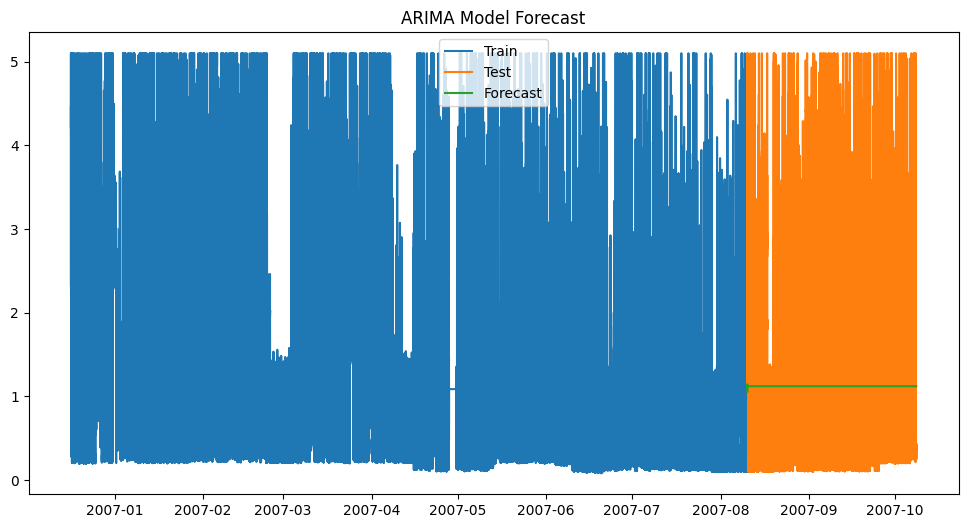

In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the preprocessed data
# Extract the relevant time series column
ts = df['Global_active_power']

# Split data into train and test sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Fit ARIMA model
p, d, q = 5, 1, 0  # Example parameters, should be determined based on ACF and PACF plots
arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()

# Forecast
forecast_arima = arima_result.forecast(steps=len(test))

# Evaluate the model
mae_arima = mean_absolute_error(test, forecast_arima)
mse_arima = mean_squared_error(test, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

print(f'ARIMA Model - MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_arima, label='Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()


c. LSTM Model:
- Prepare the data for the LSTM model by creating sequences and splitting the data into training and test sets.
- Define the LSTM model architecture.
- Train the model and evaluate its performance using MAE, MSE, and RMSE.

Epoch 1/20
2839/2839 [==============================] - 186s 64ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 2/20
2839/2839 [==============================] - 177s 62ms/step - loss: 0.0053 - val_loss: 0.0019
Epoch 3/20
2839/2839 [==============================] - 179s 63ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 4/20
2839/2839 [==============================] - 183s 65ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 5/20
2839/2839 [==============================] - 178s 63ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 6/20
2839/2839 [==============================] - 178s 63ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 7/20
2839/2839 [==============================] - 175s 62ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 8/20
2839/2839 [==============================] - 171s 60ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 9/20
2839/2839 [==============================] - 180s 64ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 10/20
2839/2839 [==============================] 

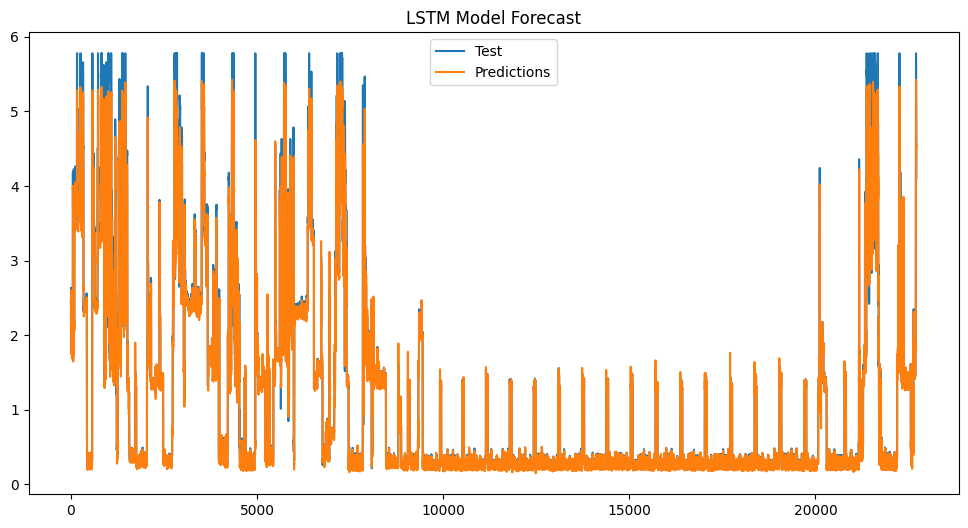

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Prepare the data for LSTM
# Normalize the data
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Example sequence length
X, y = create_sequences(ts_scaled, seq_length)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_inv, predictions)
mse_lstm = mean_squared_error(y_test_inv, predictions)
rmse_lstm = np.sqrt(mse_lstm)

print(f'LSTM Model - MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('LSTM Model Forecast')
plt.show()


**4. Feature Engineering:**
- Investigate the impact of various features on electricity consumption.
- Explore the creation of new features that might enhance prediction accuracy.

Investigate Existing Features:
- Analyze the impact of existing features (e.g., time-related features, weather data, household characteristics) on electricity consumption.
- Use correlation analysis and feature importance techniques to identify significant features.


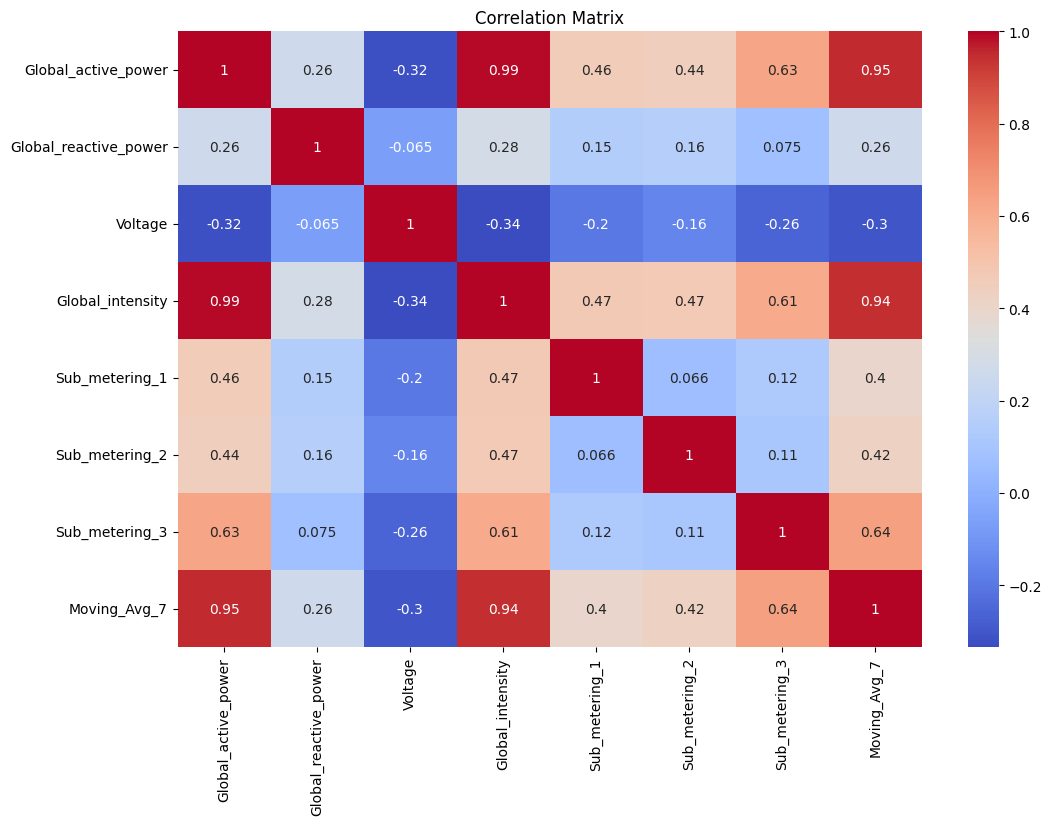

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature importance using Random Forest
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


Create New Features:
- Generate new time-related features (e.g., hour of the day, day of the week, month of the year).
- Incorporate weather data (e.g., temperature, humidity) if available.
Use lag features and rolling statistics to capture temporal dependencies.

In [9]:
# Create time-related features
df['Hour'] = df.index.hour
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month

# Lag features and rolling statistics
df['Lag_1'] = df['Global_active_power'].shift(1)
df['Lag_7'] = df['Global_active_power'].shift(7)
df['Rolling_Mean_3'] = df['Global_active_power'].rolling(window=3).mean()
df['Rolling_Mean_7'] = df['Global_active_power'].rolling(window=7).mean()

# Drop rows with NaN values created by lag features
df.dropna(inplace=True)

# Incorporate weather data (if available)
# Assuming weather_df contains columns 'Temperature' and 'Humidity'
# df = df.merge(weather_df, left_index=True, right_index=True)

# Check the first few rows of the dataframe
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Moving_Avg_7,Hour,Day_of_Week,Month,Lag_1,Lag_7,Rolling_Mean_3,Rolling_Mean_7
Datetime,,,,,,,,,,,,,,,
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,4.270571,17.0,5.0,12.0,3.702,4.216,3.640667,4.270571
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,4.065714,17.0,5.0,12.0,3.700,5.102,3.690000,4.065714
2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,3.860000,17.0,5.0,12.0,3.668,5.102,3.676667,3.860000
2006-12-16 17:34:00,4.448,0.498,232.86,19.6,0.0,1.0,17.0,3.766571,17.0,5.0,12.0,3.662,5.102,3.926000,3.766571
2006-12-16 17:35:00,5.102,0.470,232.78,23.2,0.0,1.0,17.0,3.971714,17.0,5.0,12.0,4.448,3.666,4.404000,3.971714


Evaluate Feature Impact:
- Use feature selection techniques to assess the contribution of each feature.
- Implement models with different sets of features and compare their performance.

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Split the data into train and test sets
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a simple model to evaluate feature impact
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Model with New Features - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]
print(f'Selected Features: {selected_features}')

# Re-train the model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

model.fit(X_train_selected, y_train)
predictions_selected = model.predict(X_test_selected)

# Evaluate the model with selected features
mae_selected = mean_absolute_error(y_test, predictions_selected)
mse_selected = mean_squared_error(y_test, predictions_selected)
rmse_selected = np.sqrt(mse_selected)

print(f'Model with Selected Features - MAE: {mae_selected}, MSE: {mse_selected}, RMSE: {rmse_selected}')


Model with New Features - MAE: 0.04037991377016769, MSE: 0.009922209839478039, RMSE: 0.09961028982729665
Selected Features: Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_2', 'Sub_metering_3', 'Moving_Avg_7', 'Lag_1', 'Lag_7',
       'Rolling_Mean_3', 'Rolling_Mean_7'],
      dtype='object')
Model with Selected Features - MAE: 0.04097301733547127, MSE: 0.010024924677818564, RMSE: 0.100124545830773
